<a href="https://colab.research.google.com/github/Ashwani9776/KNN_Bank/blob/master/Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
url="https://github.com/Ashwani9776/noobmaster69/blob/master/bank-additional-full.csv?raw=true"
df= pd.read_csv(url, sep = ';', na_values = 'unknown')
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,NaN,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,NaN,NaN,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
missing_value=pd.DataFrame({"missing values" : df.isnull().sum(), 
                            "percentage missing values" : (df.isnull().sum()/len(df.index)*100)})
missing_value

,missing values,percentage missing values
age,0,0.000000
job,330,0.801204
marital,80,0.194231
education,1731,4.202680
default,8597,20.872584
housing,990,2.403613
loan,990,2.403613
contact,0,0.000000
month,0,0.000000
day_of_week,0,0.000000


In [ ]:
df=df.fillna(df.mean())
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


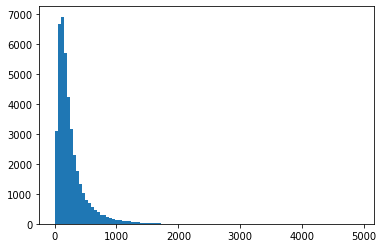

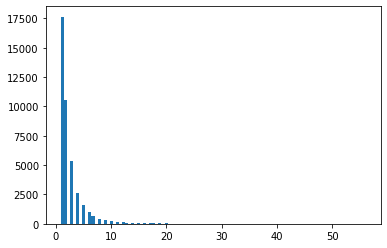

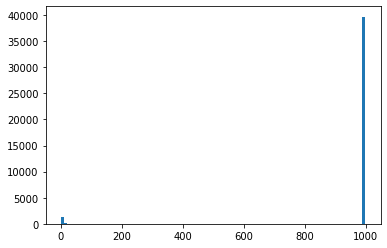

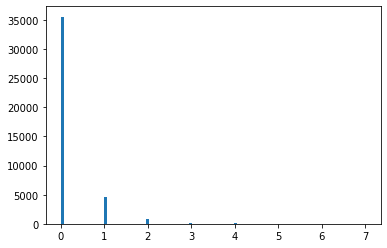

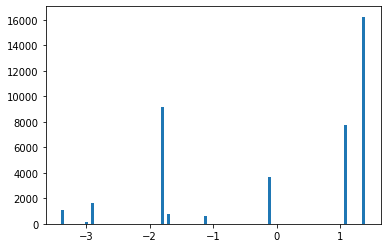

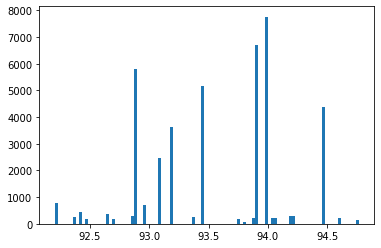

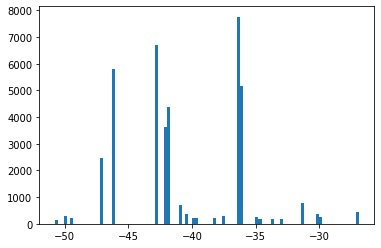

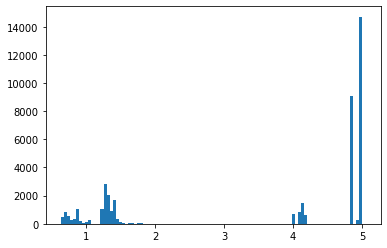

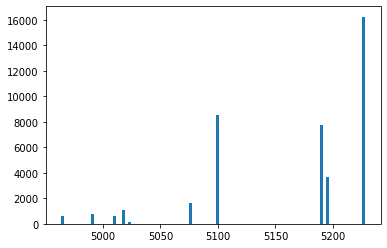

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cfe785a20>,
      dtype=object)

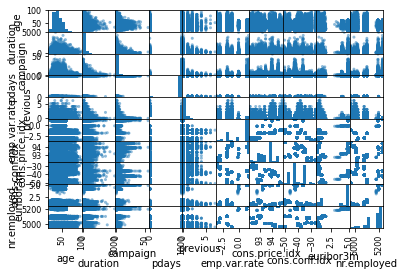

In [ ]:
dataset1 = df.copy()
dataset1.isnull

plt.hist(dataset1['duration'], bins = 100)
plt.show()

plt.hist(dataset1['campaign'], bins = 100)
plt.show()

plt.hist(dataset1['pdays'], bins = 100)
plt.show()

plt.hist(dataset1['previous'], bins = 100)
plt.show()

plt.hist(dataset1['emp.var.rate'], bins = 100)
plt.show()

plt.hist(dataset1['cons.price.idx'], bins = 100)
plt.show()

plt.hist(dataset1['cons.conf.idx'], bins = 100)
plt.show()

plt.hist(dataset1['euribor3m'], bins = 100)
plt.show()

plt.hist(dataset1['nr.employed'], bins = 100)
plt.show()

pd.plotting.scatter_matrix(dataset1)

In [ ]:
corr_mat = dataset1.corr()
corr_mat_sp = dataset1.corr('spearman')

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

dataset2 = dataset1.copy()
dataset2 = dataset2.drop(['duration', 'pdays'], axis = 1)
dataset2 = pd.get_dummies(dataset2)

X = dataset2.iloc[:, :-2]
y = dataset1.iloc[:, -1]
y = lab.fit_transform(y)

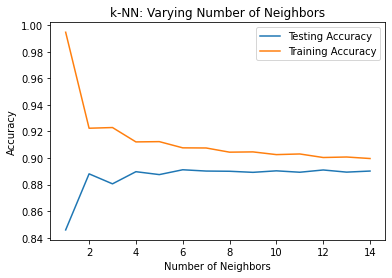

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=41)

from sklearn.neighbors import KNeighborsClassifier

neighbors = np.arange(1, 15)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):

    knn = KNeighborsClassifier(n_neighbors= k )

    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)

    test_accuracy[i] = knn.score(X_test, y_test)

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.model_selection import cross_val_score

knn = KNeighborsClassifier(n_neighbors= 5 )
knn.fit(X_train, y_train)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

cv_scores = cross_val_score(knn, X, y, cv=5)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(cv_scores)
print("\n average 5 fold tree : {}".format(np.mean(cv_scores)))

y_pred_proba=knn.predict_proba(X_test)[:,1]

print("\n ROC AUC Score knn : {}".format(roc_auc_score(y_test, y_pred_proba)))
print("\n ACCURACY SCORE : {}".format(accuracy_score(y_test,y_pred)))

[[10598   395]
 [  995   369]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.94     10993
           1       0.48      0.27      0.35      1364

    accuracy                           0.89     12357
   macro avg       0.70      0.62      0.64     12357
weighted avg       0.87      0.89      0.87     12357

[0.8873513  0.48300558 0.78939063 0.33106714 0.44882846]

 average 5 fold tree : 0.58792862091753

 ROC AUC Score knn : 0.7337364846677958

 ACCURACY SCORE : 0.8875131504410455
